In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import warnings
import torch
import numpy as np
warnings.filterwarnings("ignore")

from doclayout_yolo import YOLOv10
from ultralytics import YOLO

In [2]:
img_list = []
data_path = "data/"

for root, dirs, files in os.walk(data_path):
    for filename in files:
        temp = filename.lower()
        if temp.endswith(".jpg") or temp.endswith(".png"):
            img_list.append(os.path.join(root, filename))

In [3]:
print(f"Found {len(img_list)} images in {data_path}")

Found 16 images in data/


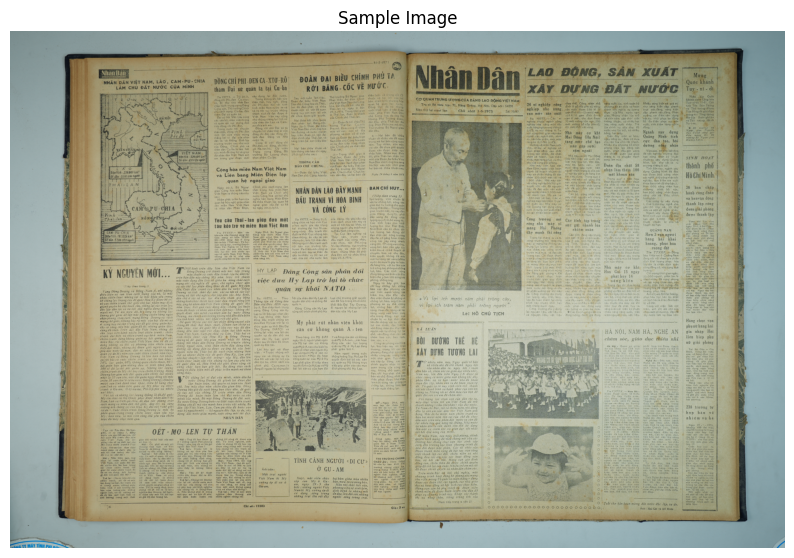

In [4]:
# plot image on this cell
sample = img_list[8]
img = cv2.imread(sample)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.title("Sample Image")
plt.show()

In [5]:
model = YOLO("checkpoint/yolo11_x.pt",
             task="segment").to(device='cuda:0')
model.info()

YOLO11x summary: 357 layers, 56,966,176 parameters, 0 gradients, 196.0 GFLOPs


(357, 56966176, 0, 195.9587328)

In [6]:
predict = model.predict(
    sample,
    verbose=False
)
print(len(predict[0].boxes))

3


Max area box: [     603.12      221.96      8957.6      6025.4]


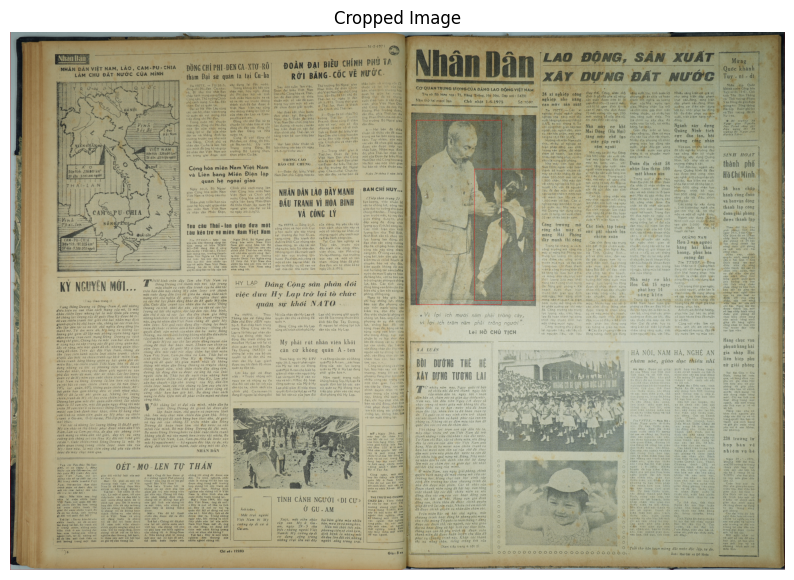

In [9]:
boxes = predict[0].boxes.xyxy.cpu().numpy()
# get the 1 maximum area box
max_area_box = boxes[np.argmax((boxes[:, 2] - boxes[:, 0]) * (boxes[:, 3] - boxes[:, 1]))]
print(f"Max area box: {max_area_box}")
# plot the cropped image
cropped_img = img[int(max_area_box[1]):int(max_area_box[3]), int(max_area_box[0]):int(max_area_box[2])]
plt.figure(figsize=(10, 10))
plt.imshow(cropped_img)
plt.axis('off')
plt.title("Cropped Image")
plt.show()